Working from Git repository b'heads/master-0-gb978a99\n'


/Users/timcornwell/env/lib/python3.5/site-packages/ipykernel/__main__.py:42: RuntimeWarning: divide by zero encountered in true_divide


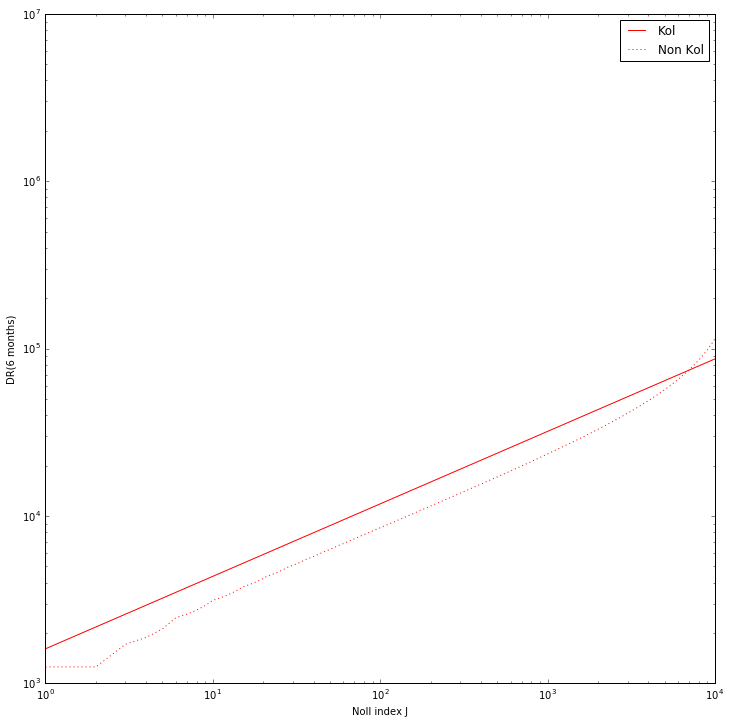

In [2]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 12.0)
#pylab.rcParams['image.cmap'] = 'rainbow' 

from telutil import *

import teliono as tk
import telionoNonKol as tnk


import subprocess
print ("Working from Git repository %s" % subprocess.check_output(["git",  "describe", "--long", "--all"]))

plt.clf()

ti=tk.TelIono()

tink=tnk.TelIono()


B=25.7
nstations=1
beta=11.0/3.0

JMax=15000
J=numpy.arange(0, JMax)

tvp=numpy.ones(JMax)
tvpnk=numpy.ones(JMax)

tvpnk[JMax-1]=tink.varphase(J[JMax-1], r0=22.0, B=2.0*B, wavelength=3.0)
for i in range(JMax-2,2,-1):
    tvpnk[i]=tink.varphase(J[i], r0=22.0, B=2.0*B, wavelength=3.0, beta=beta)+tvpnk[i+1]    

for i in range(1, JMax):
    tvp[i]=ti.varphase(J[i], r0=22.0, B=2*B, wavelength=3.0)

t6m=numpy.sqrt(365.0*24.0*3600.0/10.0)
tvpnk=tvp[0]*tvpnk/tvpnk[0]
plt.loglog(J,t6m/numpy.sqrt(2.0*tvp), color='r', label='Kol')
plt.loglog(J,t6m/numpy.sqrt(2.0*tvpnk), color='r', linestyle='dotted', label='Non Kol')


plt.xlabel('Noll index J')
plt.ylabel('DR(6 months)')
plt.xlim([1,10000])

plt.legend()

plt.show()

plt.savefig('dr.pdf')

#plt.close('all')

In [ ]:
print(tsky[:10])
print(tskynk[:10])